In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import pprint
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn import set_config
from sklearn.compose import ColumnTransformer
# from sklearn import datasets

In [2]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Let's try encoding the categorical varaibles as numericals so they can ultimately be used in the clustering algorithm

In [3]:
# Let's encode: (I have used this code block before in the 'Churn Prediction' model..)
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1})
df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})
df['InternetService'] = df['InternetService'].map({'No': 0, 'DSL': 1, 'Fiber optic': 1, 'Cable': 1})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'No': 0, 'No internet service': 0, 'Yes': 1})
df['OnlineBackup'] = df['OnlineBackup'].map({'No': 0, 'No internet service': 0, 'Yes': 1})
df['DeviceProtection'] = df['DeviceProtection'].map({'No': 0, 'No internet service': 0, 'Yes': 1})
df['TechSupport'] = df['TechSupport'].map({'No': 0, 'No internet service': 0, 'Yes': 1})
df['MultipleLines'] = df['MultipleLines'].map({'No': 0, 'No phone service': 0, 'Yes': 1})
df['StreamingTV'] = df['StreamingTV'].map({'No': 0, 'No internet service': 0, 'Yes': 1})
df['StreamingMovies'] = df['StreamingMovies'].map({'No': 0, 'No internet service': 0, 'Yes': 1})
df['Contract'] = df['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'No': 0, 'Yes': 1})
df['PaymentMethod'] = df['PaymentMethod'].map({'Mailed check': 0, 'Electronic check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [5]:
df = df.dropna(how='any',axis=0)
#df.info()

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,1,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,0,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,0,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,0,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,1,70.70,151.65,1


### At this point we have all numerical columns except for the 'customerID', which we will remove to run a first k-means clustering algorithm.

In [7]:
df_num = df.drop('customerID', axis=1)
df_num.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,1,29.85,29.85,0
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,0,56.95,1889.50,0
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,0,53.85,108.15,1
3,0,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,1,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,1,70.70,151.65,1


In [8]:
#from sklearn.compose import ColumnTransformer

attributes = list(df_num.columns.values)

attr_pipeline = Pipeline([("imputer", SimpleImputer(strategy="mean")),("scaler", StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ("rating", attr_pipeline, attributes)
    ], remainder="drop"
)

kmeans_pipeline = Pipeline(
    steps=[("preprocess", preprocessor), ("kmeans", KMeans(n_clusters=5,random_state=0))]
)

## I don't have any educated guesses for optimal clusters, so I will guess n_clusters is 5, and adjust after plotting scores
kmeans_pipeline.fit(df_num)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('rating',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'tenure', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
     

### It looks like the model ran okay. Now I want to evaluate the n_clusters with Elbow Method, but I need to iterate the various n_clusters 

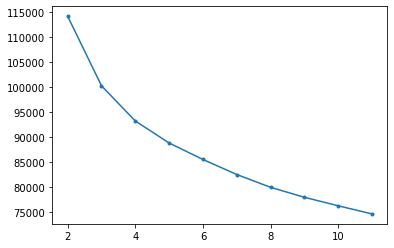

In [9]:
inertia = []
silhouette_coefficients = []
for i in range(2,12):
    kmeans_pipeline.set_params(kmeans__n_clusters=i).fit(df_num)
    inertia.append(kmeans_pipeline['kmeans'].inertia_)
    scaled_features = kmeans_pipeline.named_steps['preprocess'].fit_transform(df_num)
    score = silhouette_score(scaled_features, kmeans_pipeline['kmeans'].labels_)
    silhouette_coefficients.append(score)

# This bit is for evaluating with the Elbow Method:
plt.plot(range(2,12),inertia,marker='.')

### Hmmm.. Not super telling (No distinct "elbows", but maybe at 3?). Let's see if more can be learned with the Silhouette Scores:

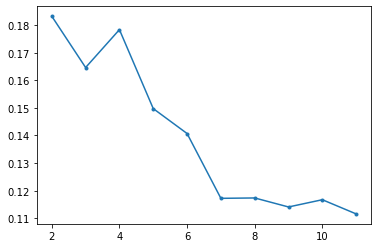

In [10]:
plt.plot(range(2,12),silhouette_coefficients,marker='.')

### This is indicating 2, with 4 as the runner up, but what do the clusters look like?

In [11]:
kmeans_pipeline.set_params(kmeans__n_clusters=2).fit(df_num)
df_num['opt_k'] = kmeans_pipeline.predict(df_num)

col1 = 'StreamingTV'

df_num.groupby('opt_k')[col1].value_counts(normalize=True)

opt_k  StreamingTV
0      0              0.842353
       1              0.157647
1      1              0.730769
       0              0.269231
Name: StreamingTV, dtype: float64

### 'StreamingTV' seems to be a polarizing factor between the two clusters/customer types..
 - 84% of Customers in Cluster 1 do not Stream TV or do not have internet service at all (from IBM Telco)
 - 73% of customers in Cluster 2 Stream TV

### There is a strong case for targeting customers who stream TV and those who do not separately.

In [12]:
col2 = 'DeviceProtection'
df_num.groupby('opt_k')[col2].value_counts(normalize=True)

opt_k  DeviceProtection
0      0                   0.881176
       1                   0.118824
1      1                   0.687635
       0                   0.312365
Name: DeviceProtection, dtype: float64

### 'DeviceProtection' seems to be a polarizing factor between the two clusters/customer types..
 - 88% of customers in Cluster 1 do not have Device Protection
 - 69% of customers in Cluster 2 do have Device Protection

In [13]:
col3 = 'MultipleLines'
df_num.groupby('opt_k')[col3].value_counts(normalize=True)

opt_k  MultipleLines
0      0                0.732706
       1                0.267294
1      1                0.658160
       0                0.341840
Name: MultipleLines, dtype: float64

### 'MultipleLines' seems to be a polarizing factor between the two clusters/customer types..
 - 73% of customers in Cluster 1 do not have multiple lines or do not have phone service
 - 66% of customers in Cluster 2 do have multiple phone lines

## In summary, customers in the first segment tend to:
 - Do not stream TV, or do not have the internet service
 - Do not have device protection
 - Do not have multiple phone lines

## Customers in the second segment:
 - Stream TV
 - Have Device Protection
 - Have multiple phone lines